# **Context**
The SMS Spam Collection Dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.


---



# **Problem Statement**
Given a dataset containing SMS messages labeled as spam or not spam, the objective is to develop a predictive model that accurately classifies new incoming messages as either spam or not spam.

---



# **Data Dictionary:**

---


The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


* **v1:** Description: Target column indicating whether the SMS message is spam or not.
Values:
"ham": Denotes non-spam SMS messages.
"spam": Denotes spam messages.

* **v2**: Column containing the text messages (SMS), which are a mix of spam and non-spam (ham) messages.

* **Unnamed: 2, Unnamed: 3, Unnamed: 4:** Additional columns with unclear labels or meanings.

---





In [ ]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/My Drive/CapstoneProject1/

# Here we set the path for our data file

Mounted at /gdrive
/gdrive/My Drive/CapstoneProject1


In [ ]:
# This code snippet tries to read a CSV file named "spam.csv" using UTF-8 encoding.
# If reading with UTF-8 encoding fails due to a UnicodeDecodeError, it retries reading the file using Latin-1 encoding.
# This approach ensures that the CSV file is successfully loaded without encoding errors.
try: # Attempt to read the CSV file with UTF-8 encoding
    data = pd.read_csv("spam.csv", encoding='utf-8')
except UnicodeDecodeError:# If UTF-8 encoding fails, fallback to Latin-1 encoding
    data = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

**The dataset has 5572 rows and 5 columns**

In [ ]:
# data cleaning
# eda
#Text preprocessing
# Model building
# Evaluation

# **1.Data Cleaning**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 columns:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
# Renaming the columns:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# The LabelEncoder is used to encode categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking for missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

**Observation: No null values seen**

In [ ]:
# Checking for duplicated values:
df.duplicated().sum()

403

**Observation: 403 duplicate values seen, which we will treat**

In [ ]:
# removing duplicates:
df = df.drop_duplicates(keep = 'first')

In [ ]:
# Checking again:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# **2.Exploratory Data Analysis:**

---



In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

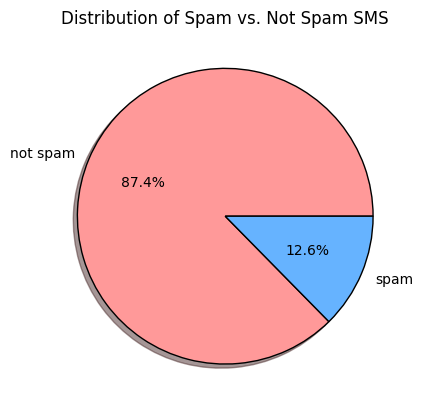

In [ ]:
# Create a pie chart to visualize the distribution of spam vs. not spam SMS
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],colors = ['#ff9999','#66b3ff'],shadow=True, autopct="%1.1f%%",wedgeprops={'edgecolor': 'black'})

# Add title to the pie chart
plt.title('Distribution of Spam vs. Not Spam SMS')
plt.show()

**Observation: Data is imbalanced, spam sms(12.6%), not spam sms (87.4%)**

---



In [ ]:
# installing 'Natural Toolkit Library(nltk)':
!pip install nltk


In [ ]:
# Importing nltk library:
import nltk

In [ ]:
# Downloading the 'punkt' module from nltk library:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Creating 3 new columns:
df['no_of_char'] = df['text'].apply(len) # for no. of characters in SMS

In [ ]:
df['no_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # For no. of words in SMS

In [ ]:
df['no_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # For no. of sentences in SMS

In [ ]:
df.head()

,target,text,no_of_char,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Descriptive Statistics of the new columns:
df[['no_of_char','no_of_words','no_of_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_char,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
no_of_words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
no_of_sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


**Observations:**
* The average length of SMS messages is around 79 characters, with a wide range from 2 to 910 characters.
* The average message contains close to 2 sentences, with some outliers having up to 38 sentences.
* The average number of words per message is approximately 18, with a variation from 1 to 220 words.

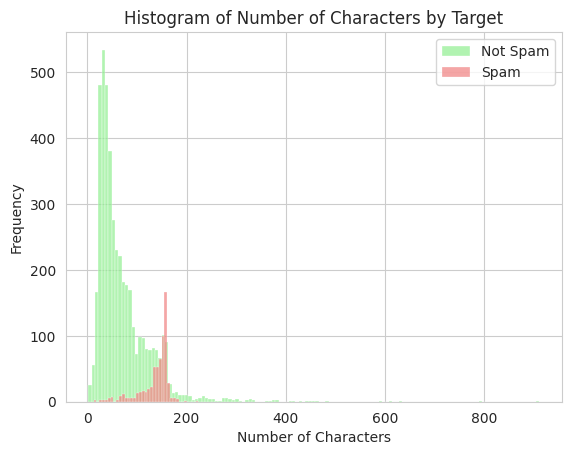

In [ ]:

# Plot histograms for the number of characters in spam and not spam messages
# Set style
sns.set_style("whitegrid")

# Plot histograms
sns.histplot(df[df['target'] == 0]['no_of_char'], color='lightgreen', alpha=0.7, label='Not Spam')
sns.histplot(df[df['target'] == 1]['no_of_char'], color='lightcoral', alpha=0.7, label='Spam')

# Add labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters by Target')

# Add legend
plt.legend()

# Show plot
plt.show()


**Observation: Not spam SMS have lesser no. of characters as compared to spam SMS**

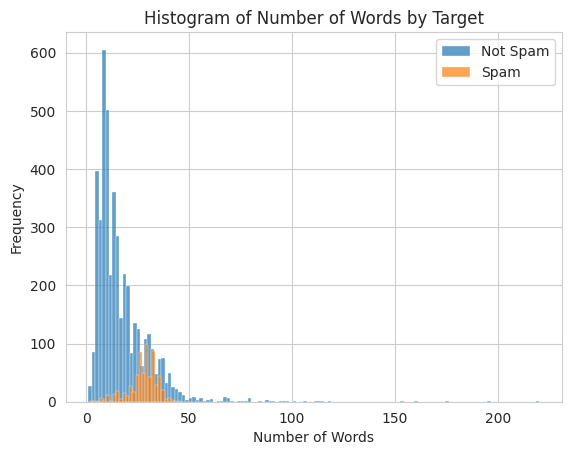

In [ ]:
# Plot histograms for the number of words in spam and not spam messages
# Set style
sns.set_style("whitegrid")

# Plot histograms
sns.histplot(df[df['target'] == 0]['no_of_words'], color='#1f77b4', alpha=0.7, label='Not Spam')
sns.histplot(df[df['target'] == 1]['no_of_words'], color='#ff7f0e', alpha=0.7, label='Spam')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words by Target')

# Add legend
plt.legend()

# Show plot
plt.show()


**Observation: Here as well, 'Not Spam' SMS have lesser words whereas 'Spam' SMS have more words**

<ipython-input-34-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

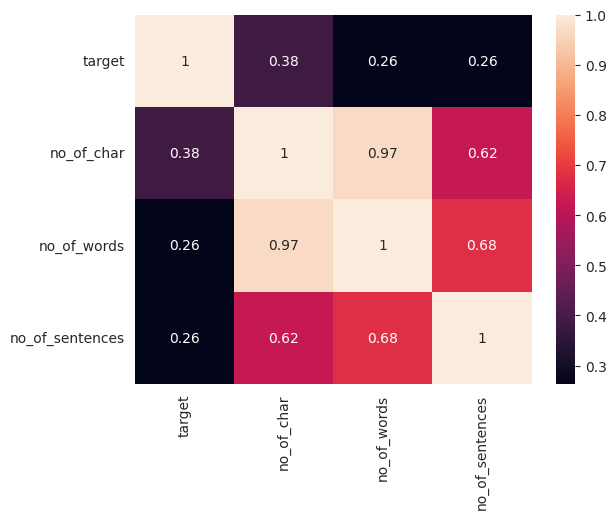

In [ ]:
# Create a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(df.corr(),annot=True)

**Observations:**


**1)High collinearity seen between no_of_sentences and no_of_words, indicating that multicollinearity exists.**

**2)Very high collinearity seen between no_of_words and no_of_characters.**

---





# **3.Data Preprocessing**
* **Lower case:** text preprocessing step where all the characters in the text are converted to lowercase.
* **Tokenization**: Tokenization is the process of breaking down a text into smaller units, typically words or subwords. These smaller units are called tokens. Tokenization helps in preparing the text for further analysis or processing by converting it into a format that is easier to work with.
* **Removing special characters:**Special characters such as punctuation marks, symbols, and other non-alphanumeric characters are often removed from the text during preprocessing. This step helps in cleaning the text and removing noise that might interfere with downstream natural language processing tasks.
* **Removing stop words and punctuation:** Stop words are common words that occur frequently in a language but usually do not carry much meaning, such as "the", "is", "and", etc. Removing stop words helps in reducing the dimensionality of the text data and improving the efficiency of text processing algorithms. Punctuation marks are also often removed along with stop words to further clean the text.
* **Stemming:** Stemming is the process of reducing words to their root or base form, called the stem. This involves removing suffixes and prefixes from words to obtain their core meaning. Stemming helps in normalizing the text and reducing variations of words to a common form, which can improve the accuracy of text analysis tasks like text classification and information retrieval.

---





In [ ]:
# This function takes a text input, preprocesses it by converting it to lowercase, tokenizing it
# removing special characters, stop words, and punctuation, and finally stemming the words.
# The preprocessed text is then returned as a string.
def transform_text(text):
  text = text.lower() # converting text into lower case
  text = nltk.word_tokenize(text) #tokenizing

  y=[]
  for i in text:
    if i.isalnum():# removing special characters
      y.append(i)

  text = y[:]
  y.clear()
# removing stop words and punctuation:
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
# The string.punctuation module provides a constant string containing all the standard punctuation symbols.
# It includes characters such as !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~.
# This module is commonly used in text processing tasks to remove punctuation from strings
# or to identify and handle punctuation in various operations such as tokenization,
# cleaning text data, or splitting sentences.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Importing stopwords module from NLTK library:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# importing the PorterStemmer class from the porter module of the stem package in the NLTK library.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# Example pf stemming:
ps.stem('loving')

'love'

In [ ]:
# Apply the transform_text function to each text in the 'text' column of the DataFrame
# and create a new column named 'transformed_text' to store the preprocessed text.
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,no_of_char,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Generating wordcloud for 'ham' messages:

# importing the WordCloud class from the wordcloud module.
from wordcloud import WordCloud

# Creating a WordCloud object with custom parameters:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# Generating a word cloud specifically for text classified as "spam":
spam_wc  = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep= " "))

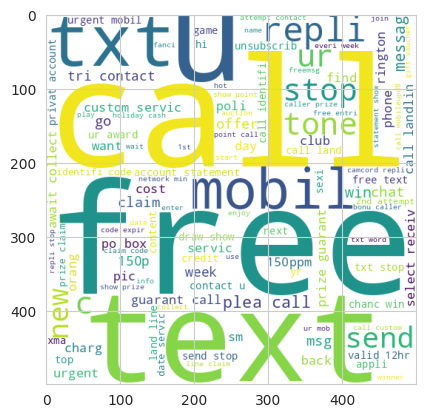

In [ ]:
# Displaing the word cloud for spam text:
# - Used `plt.imshow()` to render the word cloud image (`spam_wc`).
plt.imshow(spam_wc)

**Observation: In this visualization, we can identify the words that prominently appear in spam messages.**

In [ ]:
# Generating a word cloud specifically for text classified as "ham" (not spam):
ham_wc  = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep= " "))

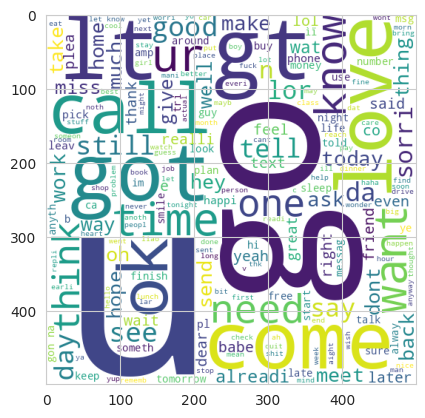

In [ ]:
# Displaing the word cloud for 'ham' text:
# - Used `plt.imshow()` to render the word cloud image (`ham_wc`).
plt.imshow(ham_wc)

**Observation: In this visualization, we can identify the words that prominently appear in 'ham'(not spam) messages.**

In [ ]:
# Top 30 words used in Spam and Ham messages:
# Initialize an empty list to store spam words
spam_words = []

# Iterate through each SMS message labeled as spam in the DataFrame
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split(): # Split the message into individual words
    spam_words.append(word) # Add each word to the spam_words list

In [ ]:
len(spam_words)

9939

In [ ]:
# Importing the Counter class from the collections module
from collections import Counter

# Using Counter to count the occurrences of words in the spam corpus,
# and then retrieving the 30 most common words along with their frequencies.
pd.DataFrame(Counter(spam_words).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


**Observation: These are the top 30 words that most commonly occur in Spam messages**

<Figure size 1000x600 with 0 Axes>

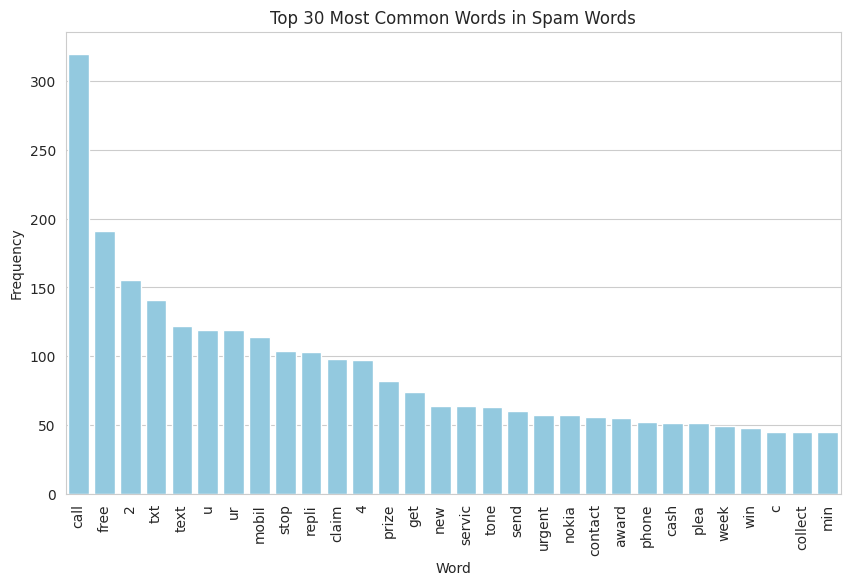

In [ ]:
# Create a bar plot to visualize the top 30 most common words in spam messages
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x=0, y=1, data=pd.DataFrame(Counter(spam_words).most_common(30)), color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Words')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Top 30 words used in Spam and Ham messages:
ham_words = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_words.append(word)

In [ ]:
len(ham_words)

35404

In [ ]:
# Using Counter to count the occurrences of words in the ham(not spam) words,
# and then retrieving the 30 most common words along with their frequencies.
pd.DataFrame(Counter(ham_words).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


**Observation: These are the top 30 words that most commonly occur in ham messages**

<Figure size 1000x600 with 0 Axes>

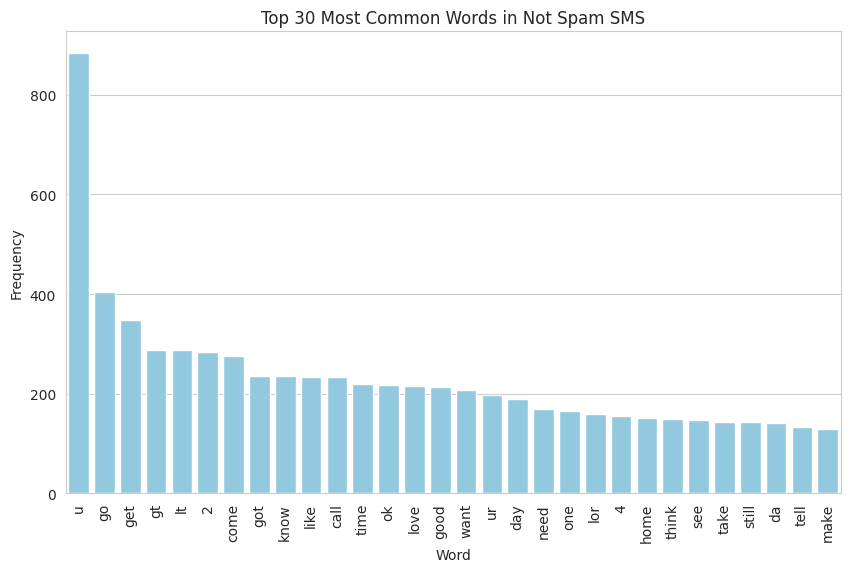

In [ ]:
# Create a bar plot to visualize the top 30 most common words in not spam messages
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x=0, y=1, data=pd.DataFrame(Counter(ham_words).most_common(30)), color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Not Spam SMS')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df.head()

,target,text,no_of_char,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **4.Model Building**

In [ ]:
# CountVectorizer is a tool in scikit-learn for converting text data into a numerical format
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd



# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit and transform the input data
X = cv.fit_transform(df['transformed_text']).toarray()


In [ ]:
X.shape

(5169, 6708)

In [ ]:
#extracting the values of the 'target' column from the DataFrame and assigning them to the variable 'y'.
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Importing train_test_split function from scikit-learn for splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into training and testing sets with a test size of 20% and a random state of 2.
# X_train and X_test represent the features for training and testing, respectively.
# y_train and y_test represent the target variable (labels) for training and testing, respectively.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Importing GaussianNB, MultinomialNB, and BernoulliNB classes from scikit-learn for Naive Bayes classification.
# Also importing accuracy_score, confusion_matrix, and precision_score functions for model evaluation.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# Initialize Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# Train Gaussian Naive Bayes classifier
gnb.fit(X_train,y_train)

# Make predictions using the trained model
y_pred1 = gnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score of the Gaussian Naive Bayes model
print(f"Accuracy : {accuracy_score(y_test,y_pred1)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred1)}")
print(f"Precision : {precision_score(y_test,y_pred1)}")

Accuracy : 0.8820116054158608
Confusion Matrix : [[794 102]
 [ 20 118]]
Precision : 0.5363636363636364


In [ ]:
# Make predictions on the training data using the trained Gaussian Naive Bayes model
y_train_pred1 = gnb.predict(X_train)

# Print accuracy, confusion matrix, and precision score of the Gaussian Naive Bayes model on the training data
print("Performance on Training Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred1)}")
print(f"Confusion Matrix: {confusion_matrix(y_train, y_train_pred1)}")
print(f"Precision: {precision_score(y_train, y_train_pred1)}")


Performance on Training Data:
Accuracy: 0.9240628778718258
Confusion Matrix: [[3306  314]
 [   0  515]]
Precision: 0.6212303980699638


In [ ]:
# Train Multinomial Naive Bayes classifier
mnb.fit(X_train,y_train)

# Make predictions using the trained model
y_pred2 = mnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score of the Multinomial Naive Bayes model
print(f"Accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred2)}")
print(f"Precision : {precision_score(y_test,y_pred2)}")

Accuracy : 0.9642166344294004
Confusion Matrix : [[871  25]
 [ 12 126]]
Precision : 0.8344370860927153


In [ ]:
# Make predictions on the training data using the trained Multinomial Naive Bayes model
y_train_pred2 = mnb.predict(X_train)

# Print accuracy, confusion matrix, and precision score of the Multinomial Naive Bayes model on the training data
print("Performance on Training Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred2)}")
print(f"Confusion Matrix: {confusion_matrix(y_train, y_train_pred2)}")
print(f"Precision: {precision_score(y_train, y_train_pred2)}")


In [ ]:
# Train Bernoulli Naive Bayes classifier
bnb.fit(X_train,y_train)

# Make predictions using the trained model
y_pred3 = bnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score of the Bernoulli Naive Bayes model
print(f"Accuracy : {accuracy_score(y_test,y_pred3)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred3)}")
print(f"Precision : {precision_score(y_test,y_pred3)}")

Accuracy : 0.9700193423597679
Confusion Matrix : [[893   3]
 [ 28 110]]
Precision : 0.9734513274336283


**Observation: As we can see, Binomial Naive Bayes, is performing well, with an accuracy of 0.97 and Precision of 0.97, so we will use this model to compare with other models that we will make using other ML Classification Algorithms**

---



In [ ]:
# Importing various classifiers from scikit-learn and XGBoost libraries for classification tasks.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Initializing various classifiers with specified hyperparameters for classification tasks.
svc = SVC(kernel='sigmoid',gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# Creating a dictionary 'clfs' to store initialized classifiers for classification tasks.
# Key-value pairs represent classifier names and their corresponding initialized instances.
clfs = {
    'SVC':svc,
    'BNB': bnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'GBDT': gbdt,
    'xgb':xgb
}

In [ ]:
# This function trains a classifier (clf) on the training data (X_train, y_train) and evaluates its performance on the test data (X_test, y_test).
# It returns the accuracy and precision scores of the classifier.
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train) # Train the classifier
  # Make predictions on the test set
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
# Calling the train_classifier function to train the Support Vector Classifier (svc) on the training data (X_train, y_train)
# and evaluate its performance on the test data (X_test, y_test).
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [ ]:
# Initializing lists to store accuracy and precision scores
accuracy_scores = []
precision_scores=[]

# Iterating over each classifier in the dictionary 'clfs'
for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test) # Training the classifier and obtaining accuracy and precision scores

 # Printing the scores for each classifier
  print("For", name)
  print("Accuracy -", current_accuracy)
  print("Precision -", current_precision)

# Appending the scores to the respective lists
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy - 0.9264990328820116
Precision - 0.7421875
For BNB
Accuracy - 0.9700193423597679
Precision - 0.9734513274336283
For DT
Accuracy - 0.9245647969052224
Precision - 0.9166666666666666
For LR
Accuracy - 0.9709864603481625
Precision - 0.9736842105263158
For RF
Accuracy - 0.9709864603481625
Precision - 1.0
For AdaBoost
Accuracy - 0.9632495164410058
Precision - 0.9385964912280702
For BgC
Accuracy - 0.9613152804642167
Precision - 0.9152542372881356
For GBDT
Accuracy - 0.9458413926499033
Precision - 0.9456521739130435
For xgb
Accuracy - 0.9758220502901354
Precision - 0.9669421487603306


In [ ]:
# Creating a DataFrame to store the performance metrics of each classifier
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)# Sorting the DataFrame by Precision score in descending order
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.970986,1.000000
3,LR,0.970986,0.973684
1,BNB,0.970019,0.973451
8,xgb,0.975822,0.966942
7,GBDT,0.945841,0.945652
5,AdaBoost,0.963250,0.938596
2,DT,0.924565,0.916667
6,BgC,0.961315,0.915254
0,SVC,0.926499,0.742188


# **5.Conclusion**

---



> Based on the provided performance metrics (Accuracy and Precision), the Random Forest (RF) classifier seems to be the best-performing model and should be selected as the final model. Here are the reasons:



* **High Precision:** The Random Forest model achieved a precision score of 1.000, indicating that it correctly classified all positive instances (spam messages) without any false positives. This suggests that the model is very good at identifying spam messages while minimizing misclassifications.

* **High Accuracy:** The Random Forest model also achieved a high accuracy score of 0.971, indicating that it correctly classified the majority of instances (both positive and negative) in the dataset. This suggests that the model performs well overall.

* **Consistency:** The Random Forest model consistently performs well across both precision and accuracy metrics, indicating robustness and reliability in its predictions.

* **Generalization:** Random Forest models are known for their ability to handle complex datasets and generalize well to unseen data. This suggests that the model is likely to perform well on new, unseen SMS messages.